In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# Load the Iris dataset
df = pd.read_csv('Iris.csv')

In [3]:
# Select features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

In [4]:
# Encode target labels
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([species_map[species] for species in y])

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train and evaluate KNN models for different K values
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


In [9]:
# Find the best K
best_k = k_values[np.argmax(accuracies)]

In [10]:
best_k

1

In [13]:
# Train the best model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

In [14]:
# Calculate accuracy for the best model
best_accuracy = accuracy_score(y_test, y_pred)

In [15]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [16]:
# Print results
print(f"Best K value: {best_k}")
print(f"Accuracy with best K: {best_accuracy:.3f}")

Best K value: 1
Accuracy with best K: 1.000


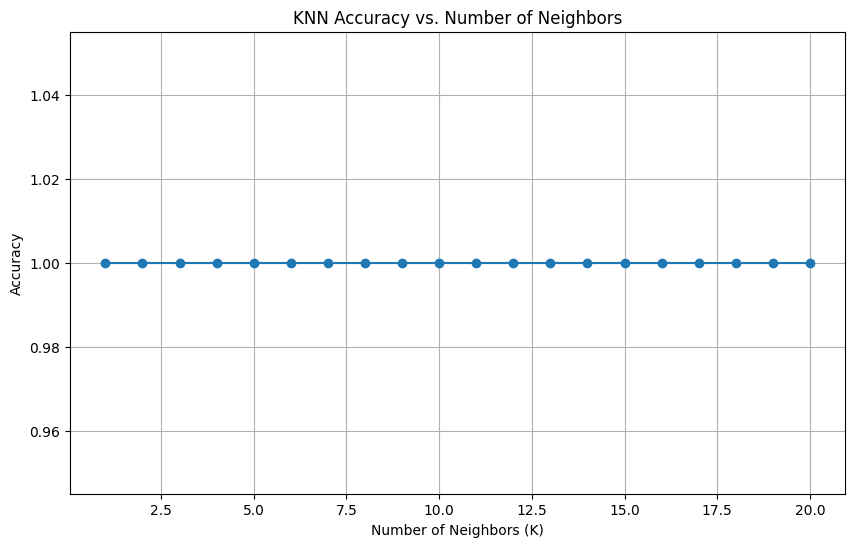

In [17]:
# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

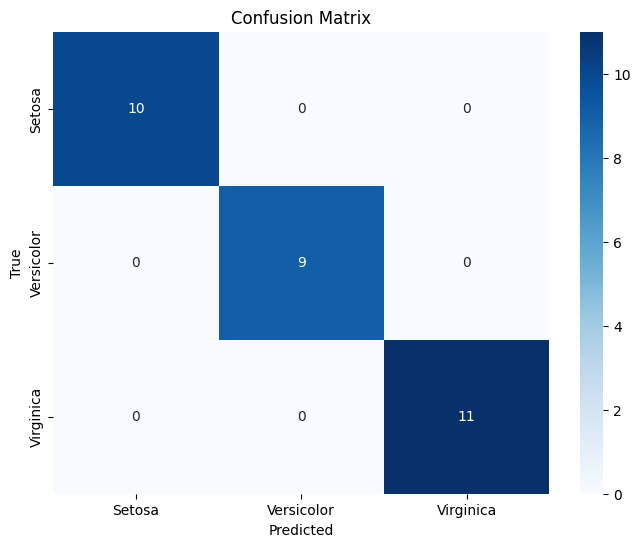

In [18]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Simplified decision boundary visualization
# Create a mesh grid for the first two features (Sepal Length and Sepal Width)
h = 0.1  # Larger step size for simplicity
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [21]:
# Calculate mean values for Petal Length and Petal Width to fill in the grid
petal_length_mean = X_train_scaled[:, 2].mean()
petal_width_mean = X_train_scaled[:, 3].mean()

In [22]:
# Create grid points with all four features (using means for Petal Length and Width)
grid_points = np.c_[xx.ravel(), yy.ravel(), 
                    np.full_like(xx.ravel(), petal_length_mean), 
                    np.full_like(xx.ravel(), petal_width_mean)]

# Predict classes for the mesh grid
Z = best_knn.predict(grid_points)
Z = Z.reshape(xx.shape)

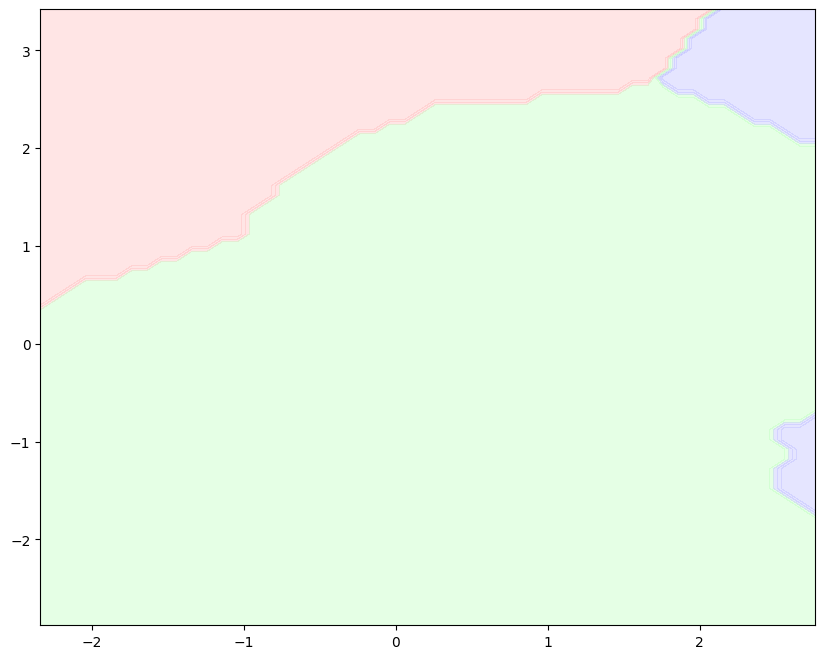

In [23]:
# Plot decision boundaries with a light color map
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.3)

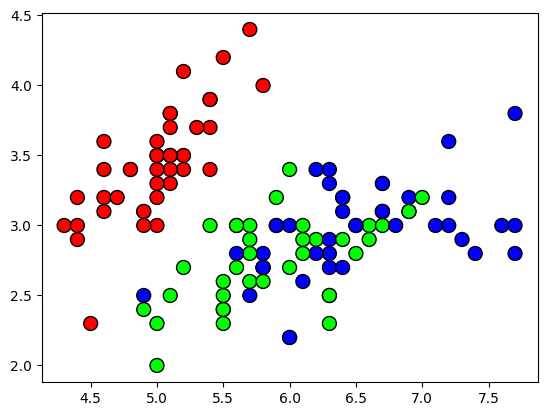

In [24]:
# Plot training points in original scale
X_train_unscaled = scaler.inverse_transform(X_train_scaled)[:, :2]
plt.scatter(X_train_unscaled[:, 0], X_train_unscaled[:, 1], c=y_train, 
            cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']),
            edgecolor='black', s=100)


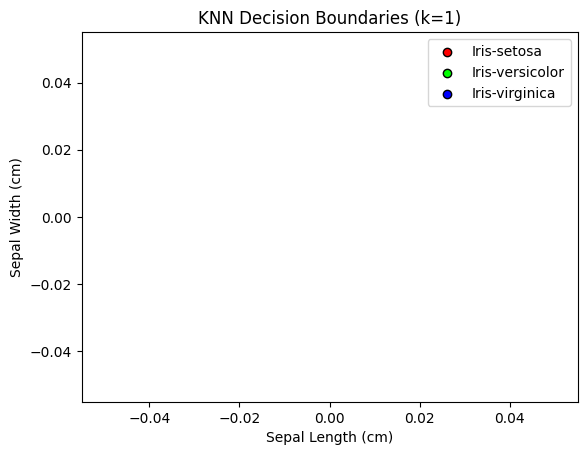

In [25]:
# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'KNN Decision Boundaries (k={best_k})')
plt.legend(handles=[
    plt.scatter([], [], c='#FF0000', label='Iris-setosa', edgecolor='black'),
    plt.scatter([], [], c='#00FF00', label='Iris-versicolor', edgecolor='black'),
    plt.scatter([], [], c='#0000FF', label='Iris-virginica', edgecolor='black')
])
plt.show()